#OpenCV basics


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread("/content/4723250.jpg")

In [ ]:
img.shape

(1200, 1920, 3)

In [ ]:
img[0][0]

array([39, 13, 31], dtype=uint8)

In [ ]:
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

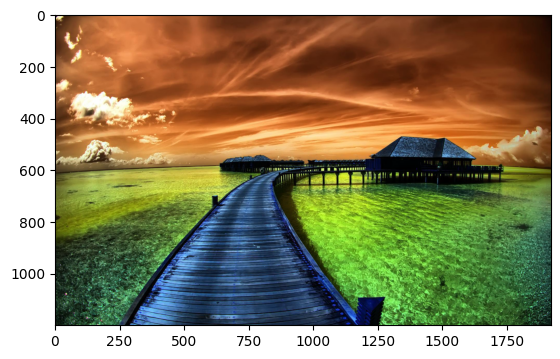

In [ ]:
plt.imshow(img)

#ColourSpaces

In [ ]:
## we imported image into an opencv object "img", OpenCV uses BGR colour space,
##so it imported and did the required settings to correctly display the image

# But, as normally the image is in RGB format, plotting it using matplotlib inverts the G and R value
## cuz the opencv object had B and R inverted.

## HSV colourspace -- Hue, saturation, value. It's a cylinder instead of a cube.


In [ ]:

rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

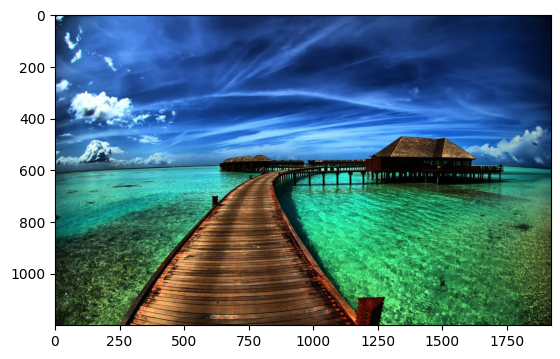

In [ ]:
plt.imshow(rgbimg)

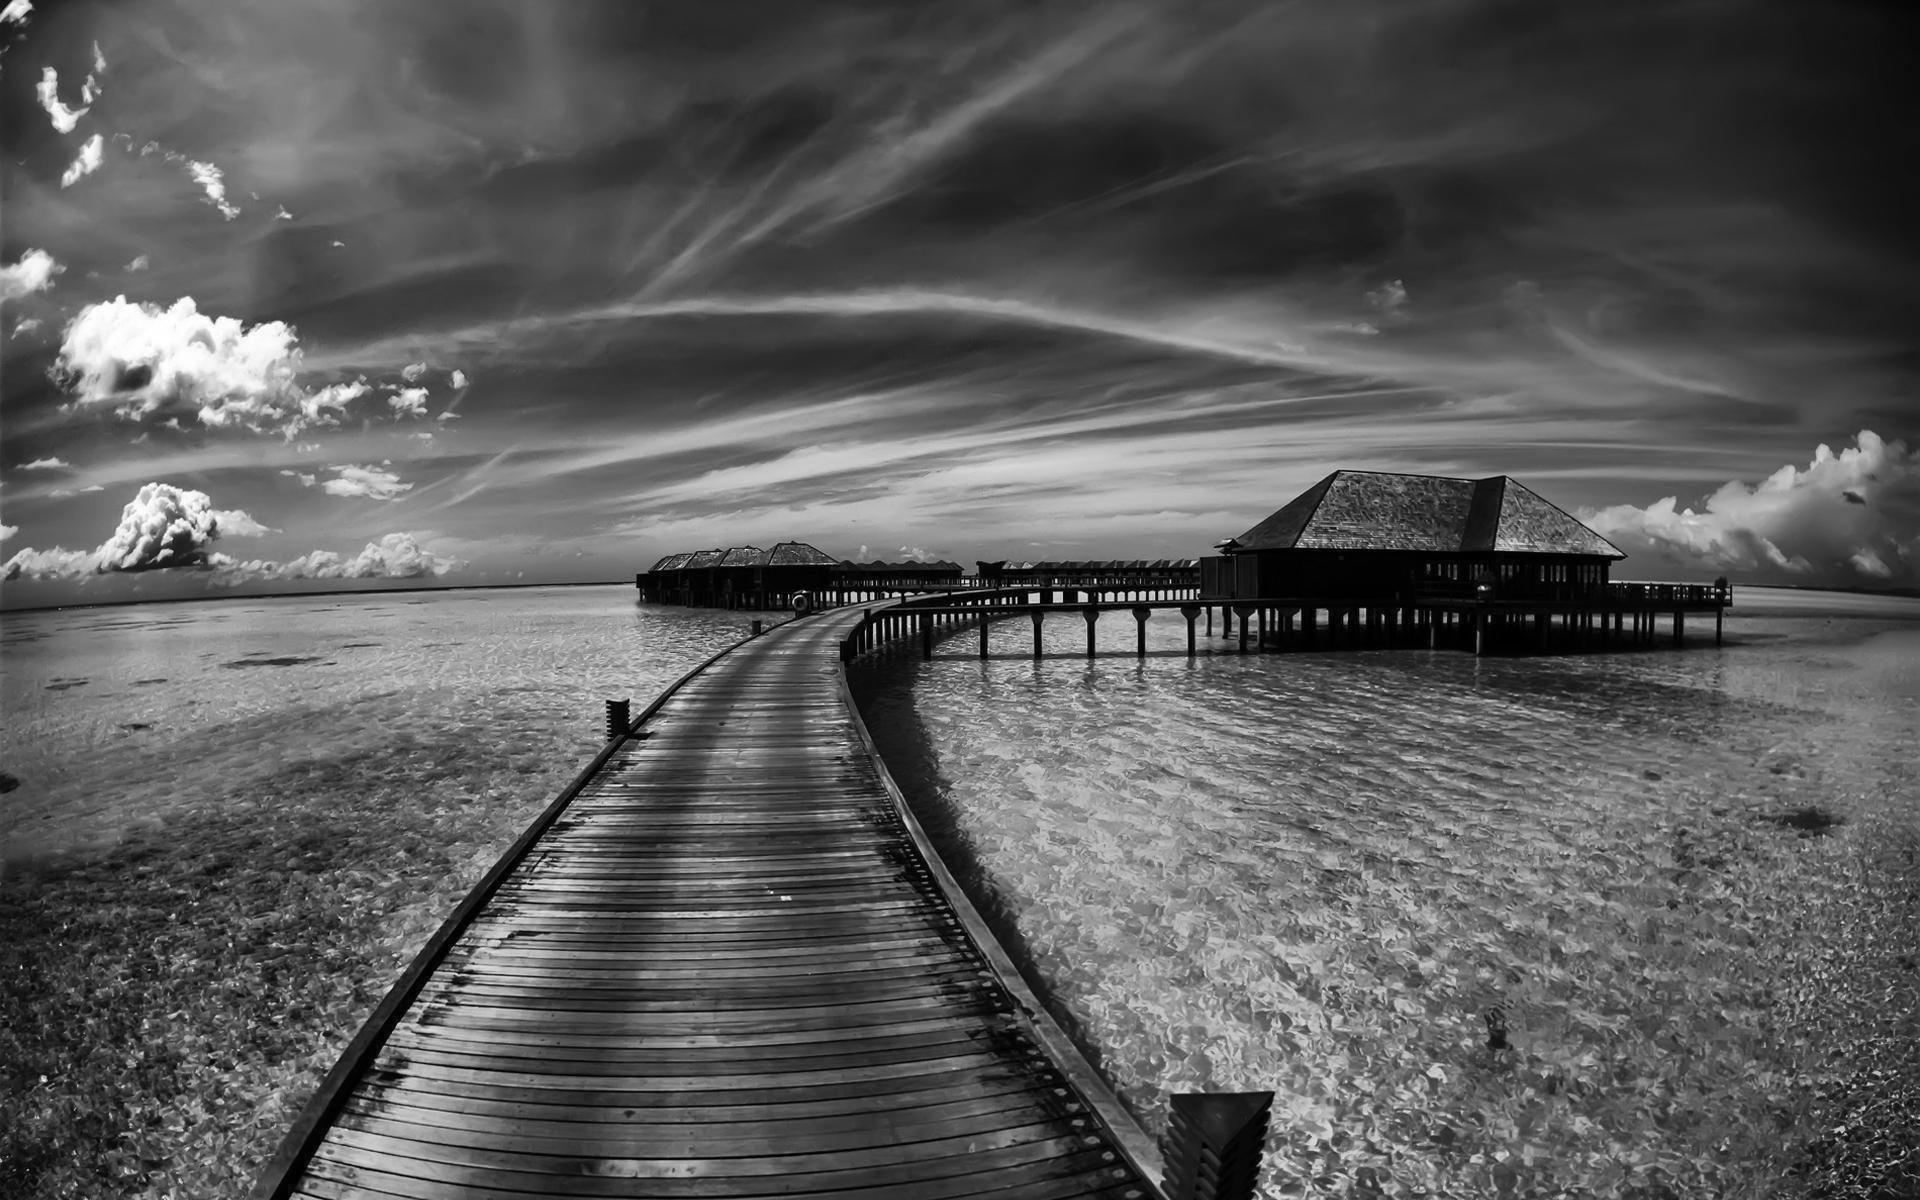

In [ ]:
cv2_imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [ ]:
imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))

Output hidden; open in https://colab.research.google.com to view.

#Brightness manipulation


In [ ]:
img.shape

(1200, 1920, 3)

In [ ]:
hue, sat, val = cv2.split(imghsv)

In [ ]:
val # a 2d array of value for each pixel, unsignedint8 type, so max is 255.

array([[39, 39, 37, ..., 16, 16, 16],
       [43, 41, 43, ..., 16, 16, 16],
       [40, 42, 45, ..., 17, 17, 17],
       ...,
       [13,  9, 10, ..., 20, 21, 24],
       [15, 12, 13, ..., 24, 22, 22],
       [22, 20, 20, ..., 27, 27, 26]], dtype=uint8)

In [ ]:
## suppose to increase the brightness, we add 240 to the value
val + 240

array([[ 23,  23,  21, ...,   0,   0,   0],
       [ 27,  25,  27, ...,   0,   0,   0],
       [ 24,  26,  29, ...,   1,   1,   1],
       ...,
       [253, 249, 250, ...,   4,   5,   8],
       [255, 252, 253, ...,   8,   6,   6],
       [  6,   4,   4, ...,  11,  11,  10]], dtype=uint8)

In [ ]:
#due to the type, the values have circled back, we don't want that for users
# so we increase the values and cap all of em to 255.

import numpy as np
val64 = val.astype(np.int64)
val64 -=50
val64

array([[-11, -11, -13, ..., -34, -34, -34],
       [ -7,  -9,  -7, ..., -34, -34, -34],
       [-10,  -8,  -5, ..., -33, -33, -33],
       ...,
       [-37, -41, -40, ..., -30, -29, -26],
       [-35, -38, -37, ..., -26, -28, -28],
       [-28, -30, -30, ..., -23, -23, -24]])

In [ ]:
# now capping to 255
val64[val64>255] = 255
val64[val64<0]=0 # cap for decreasing brightness
new_val_uint8 = val64.astype(np.uint8)


In [ ]:
brightness_increased_img = cv2.merge([hue,sat,new_val_uint8])

In [95]:
cv2_imshow(cv2.cvtColor(brightness_increased_img, cv2.COLOR_HSV2BGR))

Output hidden; open in https://colab.research.google.com to view.

#Edge detection

In [ ]:
img2 = cv2.imread("/content/pexels-martinpechy-1049446.jpg")

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [ ]:
cv2_imshow(img2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sobel_x = cv2.Sobel(img2 , ddepth = cv2.CV_64F, dx=1 , dy=0 )
sobel_y = cv2.Sobel(img2 , ddepth = cv2.CV_64F, dx=0 , dy=1 )
sobel_xy = cv2.Sobel(img2 , ddepth = cv2.CV_64F, dx=1 , dy=1 )
cv2_imshow(sobel_x)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
cv2_imshow(sobel_y)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
cv2_imshow(sobel_xy)

Output hidden; open in https://colab.research.google.com to view.